In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = 'output_data/cities.csv'

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
 # List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

In [3]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units='imperial'
queryurl= f"{url}appid={weather_api_key}&units={units}&q="

In [4]:
weatherreponse=requests.get(queryurl + city)
weatherjson=weatherreponse.json()
weatherjson

{'coord': {'lon': 26.89, 'lat': -33.59},
 'weather': [{'id': 800,
   'main': 'Clear',
   'description': 'clear sky',
   'icon': '01n'}],
 'base': 'stations',
 'main': {'temp': 59.67,
  'feels_like': 50.65,
  'temp_min': 59.67,
  'temp_max': 59.67,
  'pressure': 1008,
  'humidity': 34,
  'sea_level': 1008,
  'grnd_level': 1006},
 'wind': {'speed': 9.48, 'deg': 13},
 'clouds': {'all': 0},
 'dt': 1594600970,
 'sys': {'country': 'ZA', 'sunrise': 1594617305, 'sunset': 1594653655},
 'timezone': 7200,
 'id': 964432,
 'name': 'Port Alfred',
 'cod': 200}

In [5]:
bigcity=[]
maxtemp=[]
humid=[]
cloud=[]
wind=[]
country=[]
date=[]
lat=[]
lon=[]
record=0
setter=1
print('------------------------')
print('Beginning Data Retrieval ')
print('------------------------')
for city in cities:
    try:
        response = requests.get(queryurl + city).json()
        maxtemp.append(response['main']['temp_max'])
        humid.append(response['main']['humidity'])
        cloud.append(response['clouds']['all'])
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        wind.append(response['wind']['speed'])
        country.append(response['sys']['country'])
        date.append(response['dt'])
        if record > 49:
            record = 1
            setter += 1
            bigcity.append(city)
        else:
            record+=1
            bigcity.append(city)
            pass
        print(f'Processing Record {record} of Set {setter} | {city}')
    except Exception:
        print('City not Found.  Skipping...')
print('-----------------------')
print('Data Retrieval Complete')
print('-----------------------')

7 of Set 3 | saldanha
Processing Record 8 of Set 3 | labuhan
Processing Record 9 of Set 3 | palmer
Processing Record 10 of Set 3 | slobozia
Processing Record 11 of Set 3 | bac lieu
Processing Record 12 of Set 3 | macapa
Processing Record 13 of Set 3 | arosa
Processing Record 14 of Set 3 | cape town
Processing Record 15 of Set 3 | wanxian
Processing Record 16 of Set 3 | ende
Processing Record 17 of Set 3 | clyde river
Processing Record 18 of Set 3 | nikolskoye
Processing Record 19 of Set 3 | saskylakh
Processing Record 20 of Set 3 | torbay
Processing Record 21 of Set 3 | ilhabela
Processing Record 22 of Set 3 | mataura
Processing Record 23 of Set 3 | saint-joseph
Processing Record 24 of Set 3 | tasiilaq
Processing Record 25 of Set 3 | thompson
Processing Record 26 of Set 3 | jamestown
Processing Record 27 of Set 3 | ballitoville
Processing Record 28 of Set 3 | narsaq
Processing Record 29 of Set 3 | sevojno
Processing Record 30 of Set 3 | jalu
Processing Record 31 of Set 3 | tsumeb
Proce

In [6]:
words = {
    'City':bigcity,
    'Latitude':lat,
    'Longitude':lon,
    'Max Temp':maxtemp,
    'Humidity':humid,
    'Cloudiness':cloud,
    'Wind Speed':wind,
    'Country':country,
    'Date':date,
    }
df = pd.DataFrame(words)
df.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.59,26.89,59.67,34,0,9.48,ZA,1594600970
1,jiuquan,39.74,98.52,84.92,23,100,10.87,CN,1594601138
2,beringovskiy,63.05,179.32,51.19,81,100,9.42,RU,1594601042
3,gambela,8.25,34.58,69.64,90,100,1.99,ET,1594601164
4,punta arenas,-53.15,-70.92,33.80,83,24,8.05,CL,1594601164


In [7]:
df.to_csv("../output_data/weathercsv.csv")

In [8]:
df2 = df[df['Humidity'] < 101]
df2

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.59,26.89,59.67,34,0,9.48,ZA,1594600970
1,jiuquan,39.74,98.52,84.92,23,100,10.87,CN,1594601138
2,beringovskiy,63.05,179.32,51.19,81,100,9.42,RU,1594601042
3,gambela,8.25,34.58,69.64,90,100,1.99,ET,1594601164
4,punta arenas,-53.15,-70.92,33.80,83,24,8.05,CL,1594601164
...,...,...,...,...,...,...,...,...,...
557,koran,43.81,18.57,59.00,82,40,2.30,BA,1594601166
558,sidi ali,36.10,0.42,75.74,71,73,1.45,DZ,1594601274
559,dabakala,8.37,-4.43,70.20,94,77,3.58,CI,1594601275
560,stokmarknes,68.56,14.91,50.00,81,88,4.00,NO,1594601275


In [9]:
df3 = df[df['Humidity'] > 100]
df3

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date


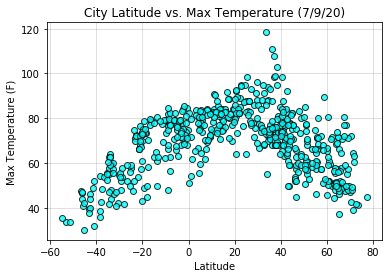

In [10]:
x=df['Latitude']
y=df['Max Temp']
x=plt.scatter(x, y,marker='o',facecolor='cyan',edgecolor='black',alpha=.80)
plt.title('City Latitude vs. Max Temperature (7/9/20)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.grid(color='grey',linestyle='-',linewidth='.5',alpha=.5)
plt.savefig('../output_data/latvstemp.png')


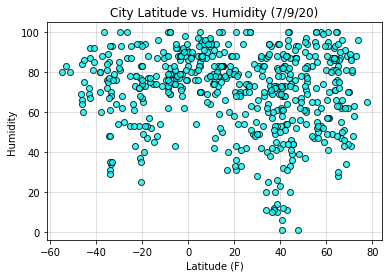

In [11]:
x=df['Latitude']
y=df['Humidity']
x=plt.scatter(x, y,marker='o',facecolor='cyan',edgecolor='black',alpha=.80)
plt.title('City Latitude vs. Humidity (7/9/20)')
plt.xlabel('Latitude (F)')
plt.ylabel('Humidity')
plt.grid(color='grey',linestyle='-',linewidth='.5',alpha=.5)
plt.savefig('../output_data/latvshum.png')

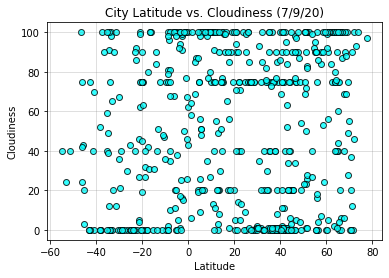

In [12]:
x=df['Latitude']
y=df['Cloudiness']
x=plt.scatter(x, y,marker='o',facecolor='cyan',edgecolor='black',alpha=.80)
plt.title('City Latitude vs. Cloudiness (7/9/20)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.grid(color='grey',linestyle='-',linewidth='.5',alpha=.5)
plt.savefig('../output_data/latvscloud.png')

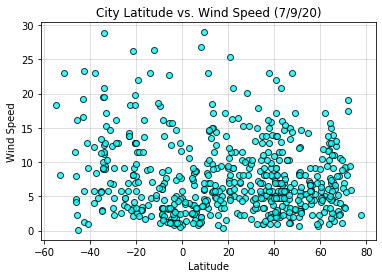

In [13]:
x=df['Latitude']
y=df['Wind Speed']
x=plt.scatter(x, y,marker='o',facecolor='cyan',edgecolor='black',alpha=.80)
plt.title('City Latitude vs. Wind Speed (7/9/20)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.grid(color='grey',linestyle='-',linewidth='.5',alpha=.5)
plt.savefig('../output_data/latvswind.png')

In [14]:
north = df[df['Latitude'] > 0]
north.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
1,jiuquan,39.74,98.52,84.92,23,100,10.87,CN,1594601138
2,beringovskiy,63.05,179.32,51.19,81,100,9.42,RU,1594601042
3,gambela,8.25,34.58,69.64,90,100,1.99,ET,1594601164
5,little chute,44.28,-88.32,78.01,33,20,8.05,US,1594601164
6,chino valley,34.76,-112.45,93.99,25,20,12.75,US,1594601164


In [15]:
south = df[df['Latitude'] < 0]
south.head()

,City,Latitude,Longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,port alfred,-33.59,26.89,59.67,34,0,9.48,ZA,1594600970
4,punta arenas,-53.15,-70.92,33.80,83,24,8.05,CL,1594601164
7,esperance,-33.87,121.90,48.20,61,0,20.80,AU,1594601056
8,arraial do cabo,-22.97,-42.03,72.46,78,92,13.87,BR,1594600948
9,ushuaia,-54.80,-68.30,35.60,80,40,18.34,AR,1594601165


The r-squared is: -0.5713543243345482


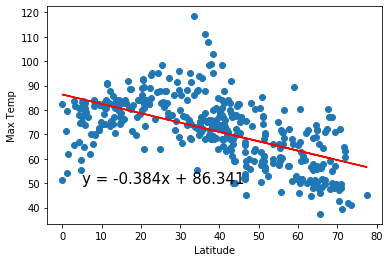

In [17]:
x=np.array(north['Latitude'])
y=np.array(north['Max Temp'])
lblpos=(5,50)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
print(f"The r-squared is: {rvalue}")
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,lblpos,fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig('../output_data/northlatvstempreg.png')
plt.show()

The r-squared is: 0.8071211915677377


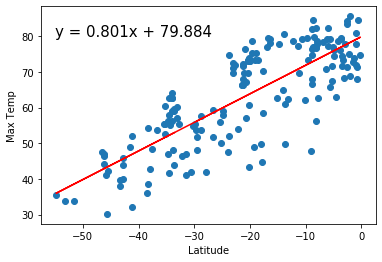

In [18]:
x=np.array(south['Latitude'])
y=np.array(south['Max Temp'])
lblpos=(-55,80)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
print(f"The r-squared is: {rvalue}")
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,lblpos,fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig('../output_data/southlatvstempreg.png')
plt.show()

The r-squared is: -0.12577992188113213


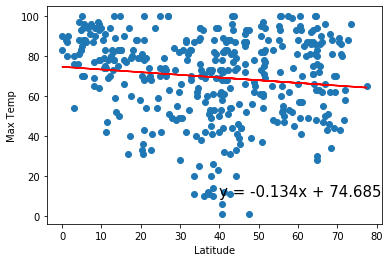

In [19]:
x=np.array(north['Latitude'])
y=np.array(north['Humidity'])
lblpos=(40,10)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
print(f"The r-squared is: {rvalue}")
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,lblpos,fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.savefig('../output_data/northlatvshumidreg.png')
plt.show()

The r-squared is: 0.1664809147464058


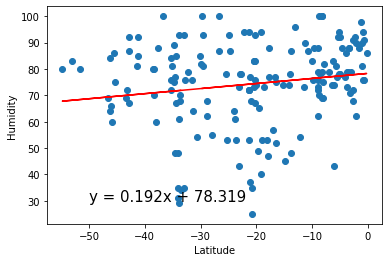

In [20]:
x=np.array(south['Latitude'])
y=np.array(south['Humidity'])
lblpos=(-50,30)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
print(f"The r-squared is: {rvalue}")
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,lblpos,fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('../output_data/southlatvshumidreg.png')
plt.show()

The r-squared is: -0.014254865396989615


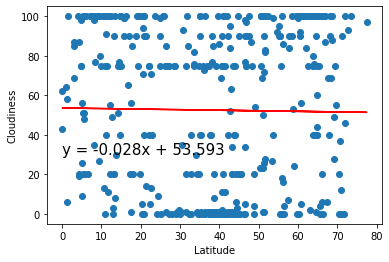

In [24]:
x=np.array(north['Latitude'])
y=np.array(north['Cloudiness'])
lblpos=(0,30)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
print(f"The r-squared is: {rvalue}")
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,lblpos,fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('../output_data/northlatvscloud.png')
plt.show()

The r-squared is: 0.2569053342090702


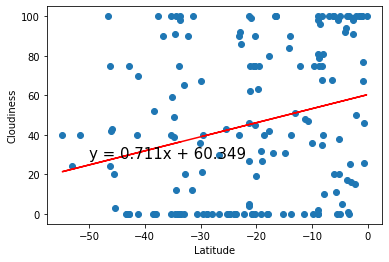

In [23]:
x=np.array(south['Latitude'])
y=np.array(south['Cloudiness'])
lblpos=(-50,28)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
print(f"The r-squared is: {rvalue}")
regress_values = x * slope + intercept
line_eq = "y = " + str(round(slope,3)) + "x + " + str(round(intercept,3))
plt.scatter(x,y)
plt.plot(x,regress_values,"r-")
plt.annotate(line_eq,lblpos,fontsize=15,color="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.savefig('../output_data/southlatvscloud.png')
plt.show()